In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.utils import resample

In [2]:
df=pd.read_csv('train.csv')
df = df.drop_duplicates(keep='last')
print('colums', df.shape[1])
print('rows', df.shape[0])

colums 24
rows 159256


In [3]:
df.shape

(159256, 24)

In [4]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
df.nunique().sort_values()


smoking                     2
dental caries               2
hearing(left)               2
hearing(right)              2
Urine protein               6
height(cm)                 14
eyesight(right)            17
age                        18
eyesight(left)             20
serum creatinine           28
weight(kg)                 28
relaxation                 75
HDL                       108
systolic                  112
hemoglobin                134
AST                       140
ALT                       188
LDL                       222
Cholesterol               227
fasting blood sugar       229
Gtp                       362
triglyceride              392
waist(cm)                 531
id                     159256
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
df['smoking'].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

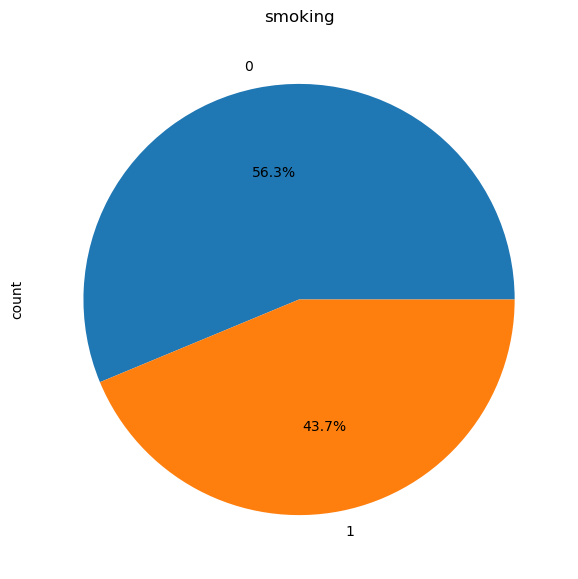

In [8]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking')
plt.show()

                       min     max
age                   20.0    85.0
height(cm)           135.0   190.0
weight(kg)            30.0   130.0
waist(cm)             51.0   127.0
eyesight(left)         0.1     9.9
eyesight(right)        0.1     9.9
hearing(left)          1.0     2.0
hearing(right)         1.0     2.0
systolic              77.0   213.0
relaxation            44.0   133.0
fasting blood sugar   46.0   375.0
Cholesterol           77.0   393.0
triglyceride           8.0   766.0
HDL                    9.0   136.0
LDL                    1.0  1860.0
hemoglobin             4.9    21.0
Urine protein          1.0     6.0
serum creatinine       0.1     9.9
AST                    6.0   778.0
ALT                    1.0  2914.0
Gtp                    2.0   999.0
dental caries          0.0     1.0
smoking                0.0     1.0


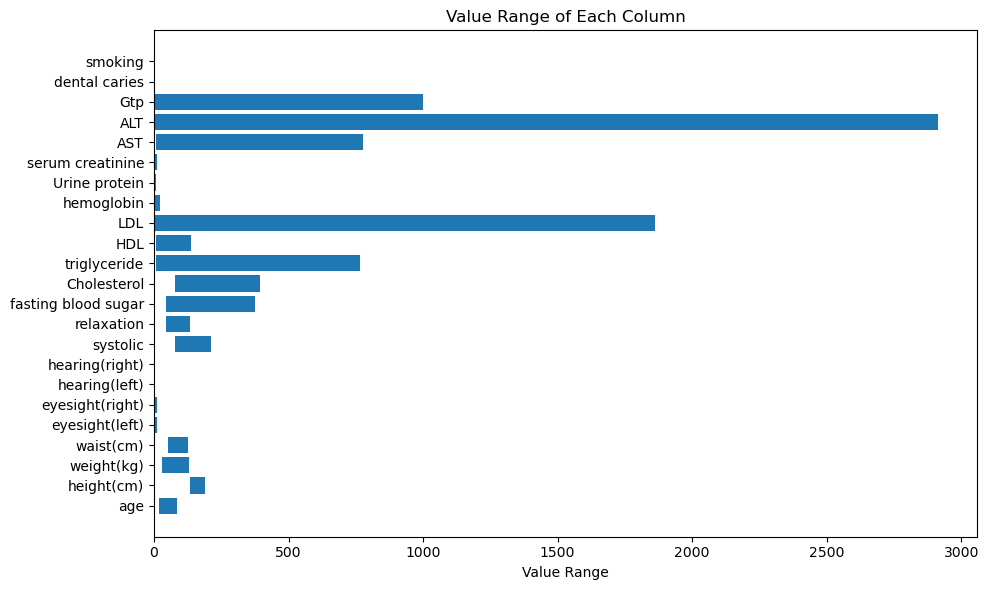

In [9]:
import matplotlib.pyplot as plt

summary = df.drop(columns='id').describe().loc[["min", "max"]].T
print(summary)
summary["range"] = summary["max"] - summary["min"]

plt.figure(figsize=(10, 6))
plt.barh(summary.index, summary["range"], left=summary["min"])
plt.xlabel("Value Range")
plt.title("Value Range of Each Column")
plt.tight_layout()
plt.show()

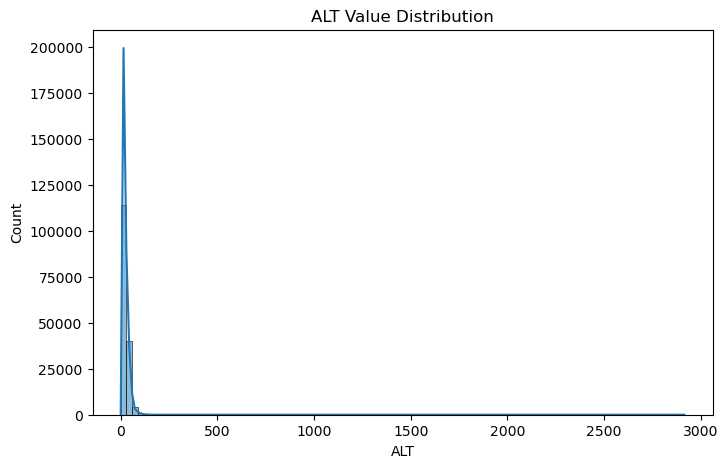

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["ALT"], bins=100, kde=True)  
plt.title("ALT Value Distribution")
plt.xlabel("ALT")
plt.ylabel("Count")
plt.show()

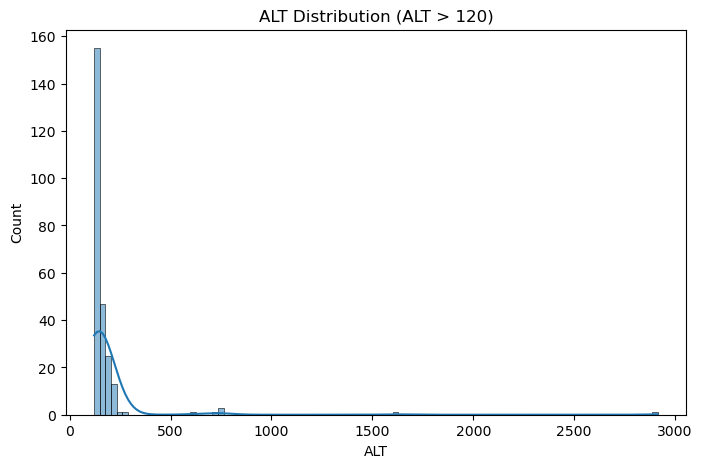

In [11]:

plt.figure(figsize=(8, 5))
sns.histplot(df[df["ALT"] > 120]["ALT"], bins=100, kde=True)
plt.title("ALT Distribution (ALT > 120)")
plt.xlabel("ALT")
plt.ylabel("Count")
plt.show()

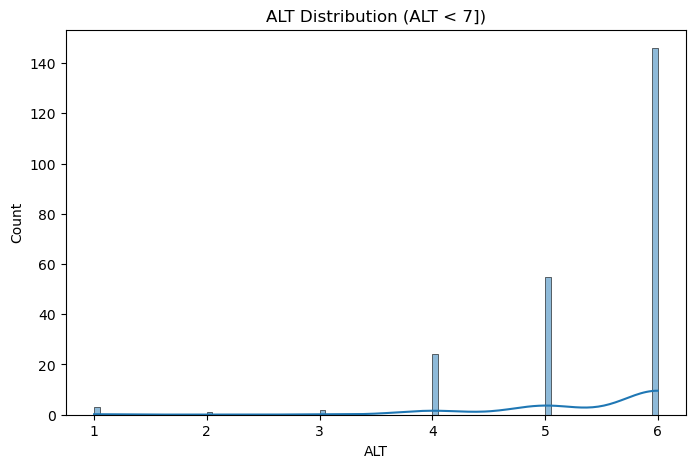

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["ALT"] < 7]["ALT"], bins=100, kde=True)
plt.title("ALT Distribution (ALT < 7])")
plt.xlabel("ALT")
plt.ylabel("Count")
plt.show()

In [13]:
df= df[df["ALT"] <= 300]
df= df[df["ALT"] > 4]

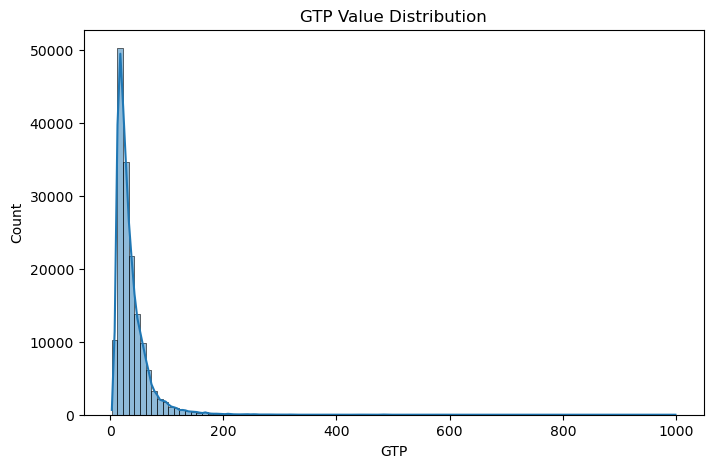

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Gtp"], bins=100, kde=True)  
plt.title("GTP Value Distribution")
plt.xlabel("GTP")
plt.ylabel("Count")
plt.show()

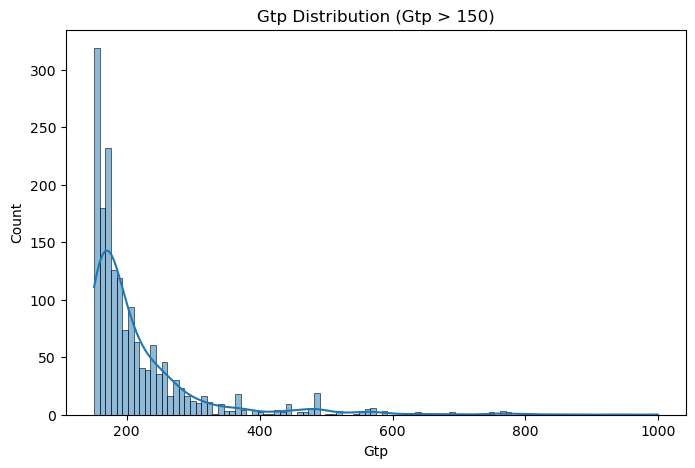

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Gtp"] > 150]["Gtp"], bins=100, kde=True)
plt.title("Gtp Distribution (Gtp > 150)")
plt.xlabel("Gtp")
plt.ylabel("Count")
plt.show()

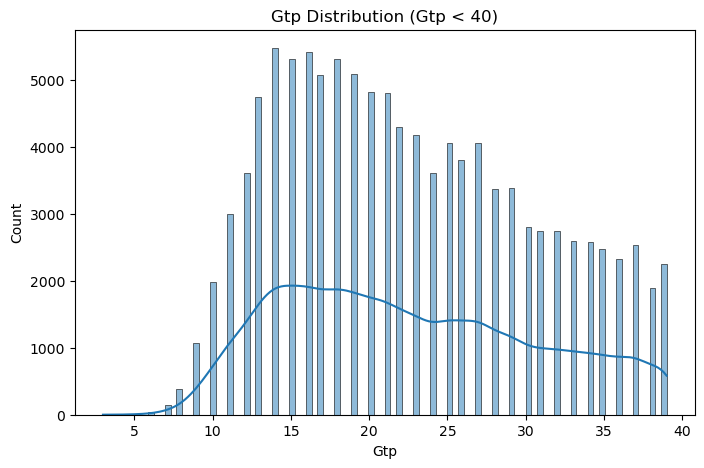

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Gtp"] < 40]["Gtp"], bins=100, kde=True)
plt.title("Gtp Distribution (Gtp < 40)")
plt.xlabel("Gtp")
plt.ylabel("Count")
plt.show()

In [17]:
df = df[df['Gtp'] <= 170]
df = df[df['Gtp'] >= 6]

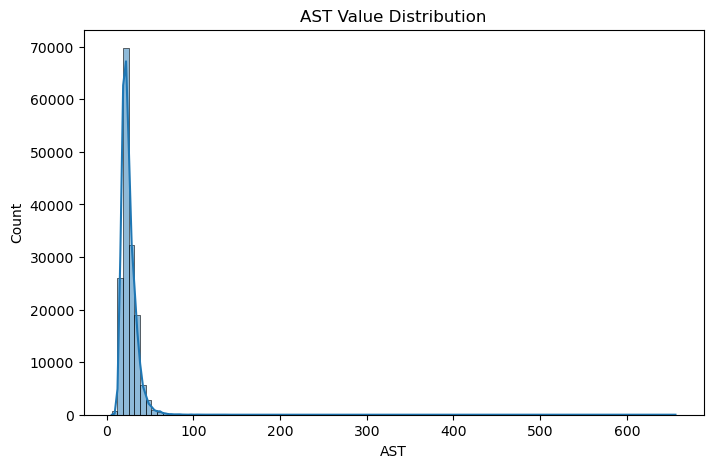

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["AST"], bins=100, kde=True)  
plt.title("AST Value Distribution")
plt.xlabel("AST")
plt.ylabel("Count")
plt.show()

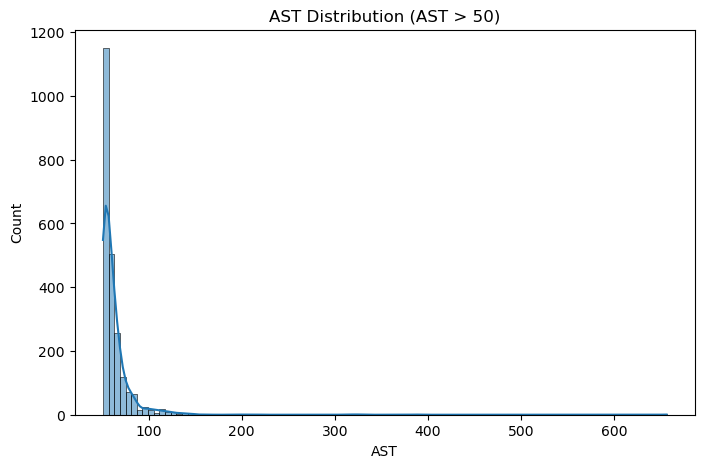

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["AST"] > 50]["AST"], bins=100, kde=True)
plt.title("AST Distribution (AST > 50)")
plt.xlabel("AST")
plt.ylabel("Count")
plt.show()

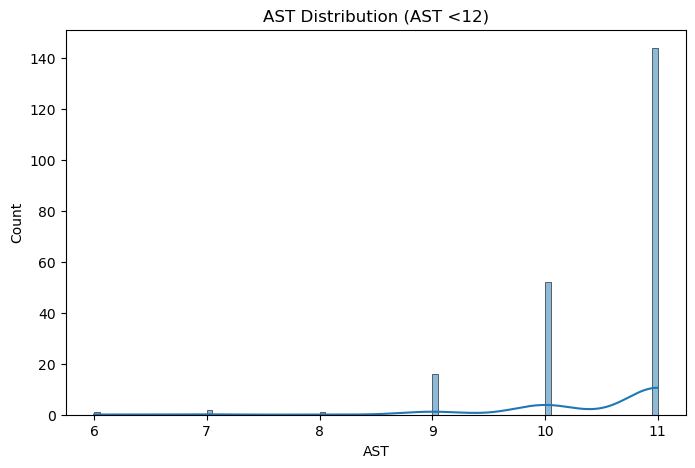

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["AST"] <12 ]["AST"], bins=100, kde=True)
plt.title("AST Distribution (AST <12)")
plt.xlabel("AST")
plt.ylabel("Count")
plt.show()

In [21]:
df = df[df["AST"] < 100]
df = df[df["AST"] >=9]

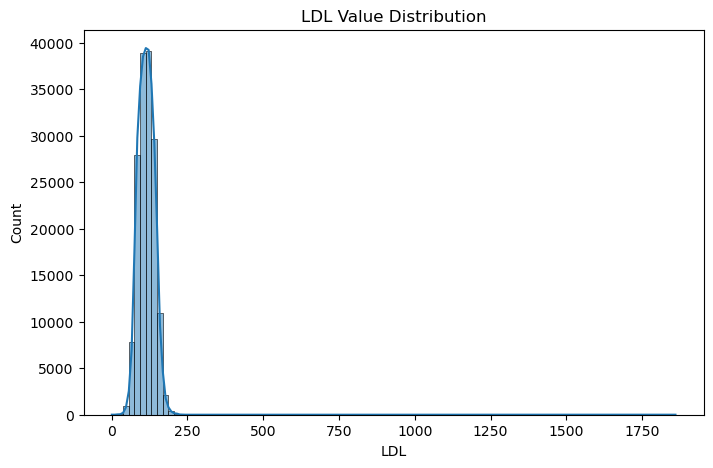

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df["LDL"], bins=100, kde=True)  
plt.title("LDL Value Distribution")
plt.xlabel("LDL")
plt.ylabel("Count")
plt.show()

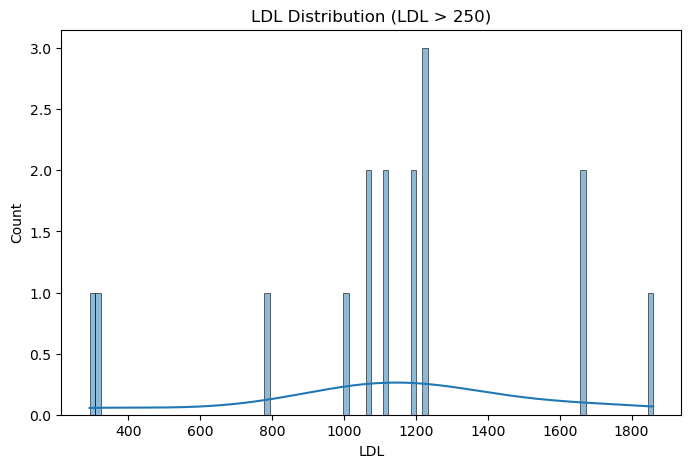

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["LDL"] > 250]["LDL"], bins=100, kde=True)
plt.title("LDL Distribution (LDL > 250)")
plt.xlabel("LDL")
plt.ylabel("Count")
plt.show()

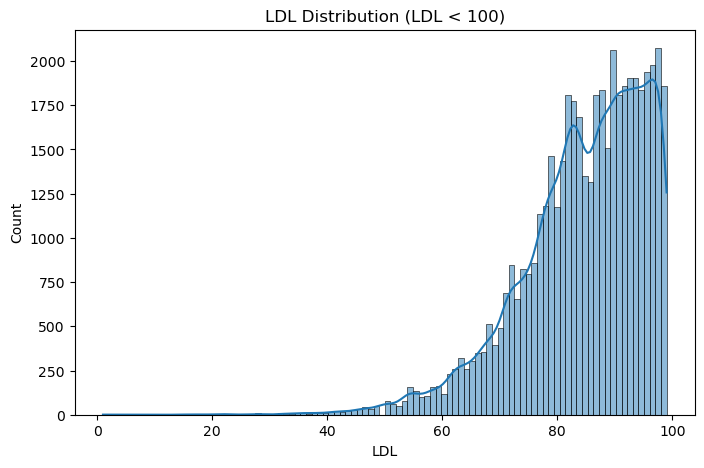

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["LDL"] < 100]["LDL"], bins=100, kde=True)
plt.title("LDL Distribution (LDL < 100)")
plt.xlabel("LDL")
plt.ylabel("Count")
plt.show()

In [25]:
df = df[df["LDL"] < 250]
df = df[df["LDL"] > 30]

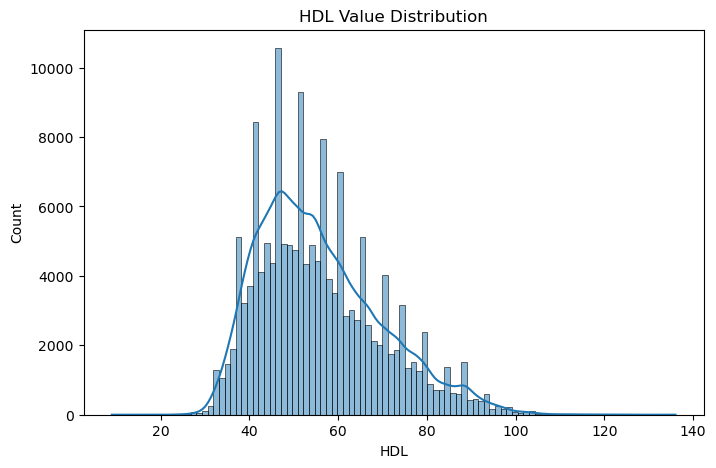

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df["HDL"], bins=100, kde=True)  
plt.title("HDL Value Distribution")
plt.xlabel("HDL")
plt.ylabel("Count")
plt.show()

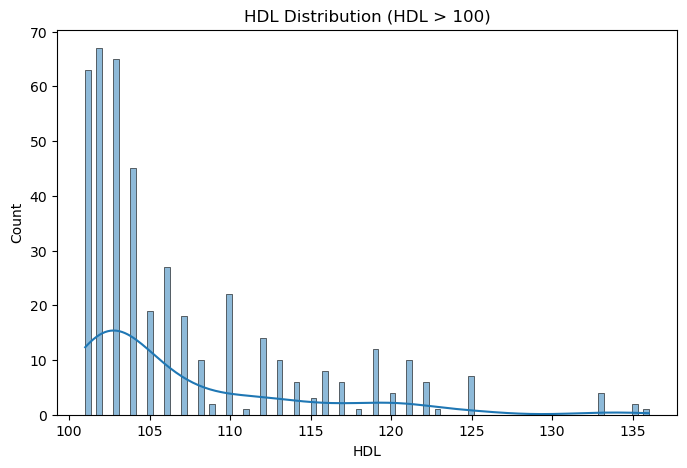

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["HDL"] > 100]["HDL"], bins=100, kde=True)
plt.title("HDL Distribution (HDL > 100)")
plt.xlabel("HDL")
plt.ylabel("Count")
plt.show()

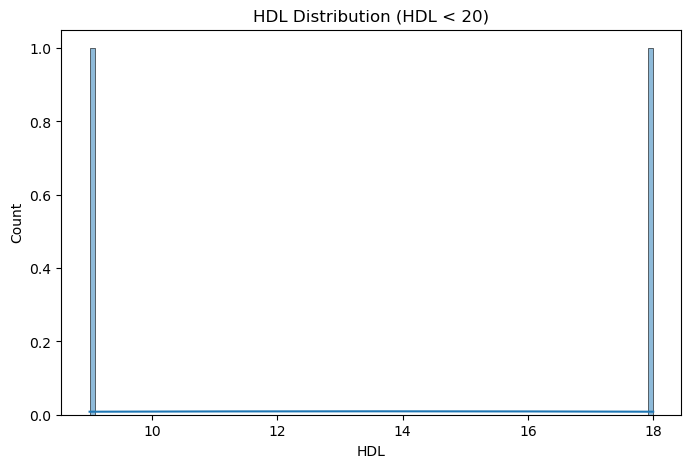

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["HDL"] < 20]["HDL"], bins=100, kde=True)
plt.title("HDL Distribution (HDL < 20)")
plt.xlabel("HDL")
plt.ylabel("Count")
plt.show()

In [29]:
df = df[df["HDL"] < 105]
df = df[df["HDL"] > 20]

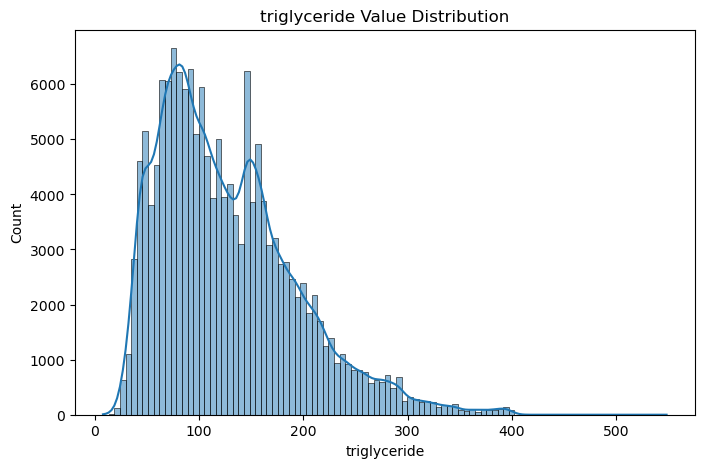

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df["triglyceride"], bins=100, kde=True)  
plt.title("triglyceride Value Distribution")
plt.xlabel("triglyceride")
plt.ylabel("Count")
plt.show()

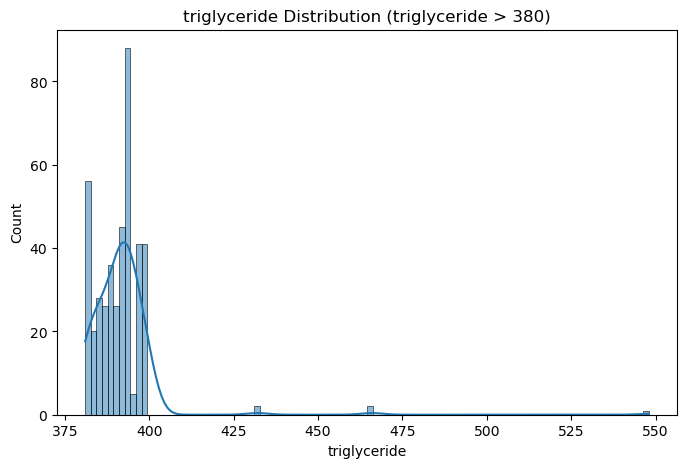

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["triglyceride"] > 380]["triglyceride"], bins=100, kde=True)
plt.title("triglyceride Distribution (triglyceride > 380)")
plt.xlabel("triglyceride")
plt.ylabel("Count")
plt.show()

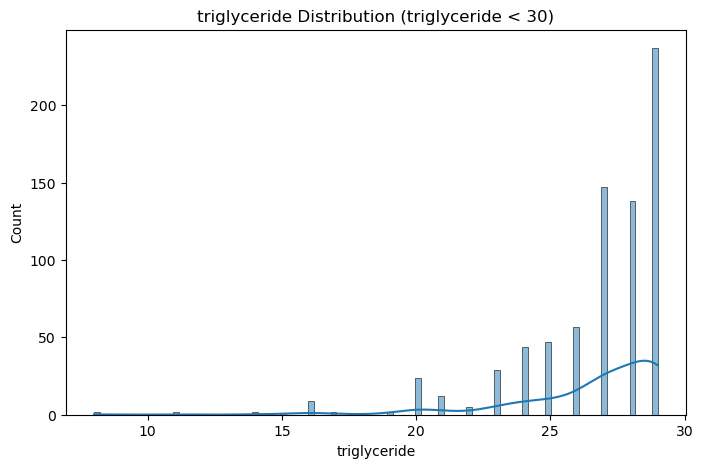

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["triglyceride"] <30]["triglyceride"], bins=100, kde=True)
plt.title("triglyceride Distribution (triglyceride < 30)")
plt.xlabel("triglyceride")
plt.ylabel("Count")
plt.show()

In [33]:
df = df[df["triglyceride"] <= 400]
df = df[df["triglyceride"] > 20]

In [34]:
df['smoking'].value_counts()

smoking
0    89065
1    68690
Name: count, dtype: int64

In [35]:
n_samples=68690
df_1 = df[df['smoking'] == 0]
df_2 = df[df['smoking'] == 1]
df_1_down = resample(df_1, replace=False, n_samples=n_samples, random_state=42)
df_balanced = pd.concat([df_1_down, df_2]).sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
df_balanced['smoking'].value_counts()

smoking
0    68690
1    68690
Name: count, dtype: int64

In [ ]:
grouped = df_balanced.groupby("smoking")
df_0 = grouped.get_group(0)
df_1 = grouped.get_group(1)


df_0_sub = df_0.sample(n=1000, random_state=42)
df_1_sub = df_1.sample(n=1000, random_state=42)
df_sub = pd.concat([df_0_sub, df_1_sub])


df_balanced = df_balanced.drop(df_sub.index)
df_balanced = df_balanced.reset_index(drop=True)


test_set = df_sub.sample(frac=1, random_state=42).reset_index(drop=True)




grouped_remain = df_balanced.groupby("smoking")

df_0_train = grouped_remain.get_group(0).sample(n=10000, random_state=42)
df_1_train = grouped_remain.get_group(1).sample(n=10000, random_state=42)
train_set = pd.concat([df_0_train, df_1_train])


df_balanced = df_balanced.drop(train_set.index)
df_balanced=df_balanced.reset_index(drop=True)

train_set= train_set.sample(frac=1, random_state=42).reset_index(drop=True)




In [38]:
# df_balanced.to_csv('balanced_cleaned_dataset.csv')
# test_set.to_csv('testset.csv')
# train_set.to_csv('balanced_cleaned_trian_dataset.csv')

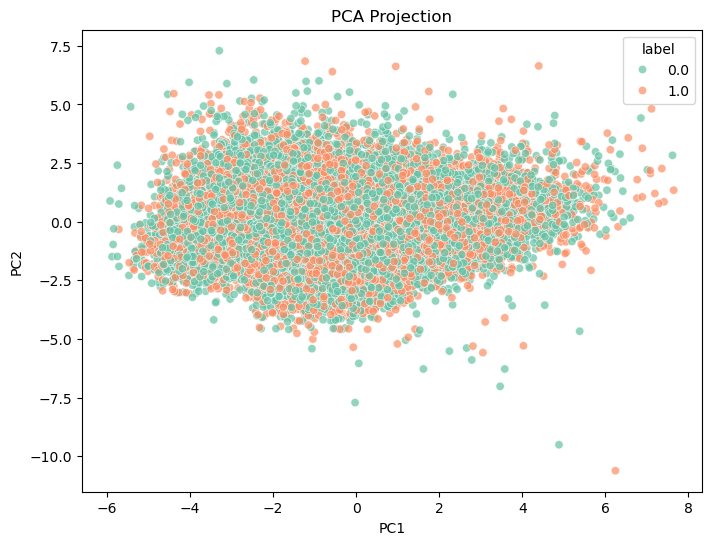

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
train_copy=train_set
X = train_copy.drop('smoking', axis=1)
y = train_copy['smoking']


pca=PCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

import matplotlib.pyplot as plt
import seaborn as sns

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["label"] = df["smoking"]  

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="label", palette="Set2", alpha=0.7)
plt.title("PCA Projection")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


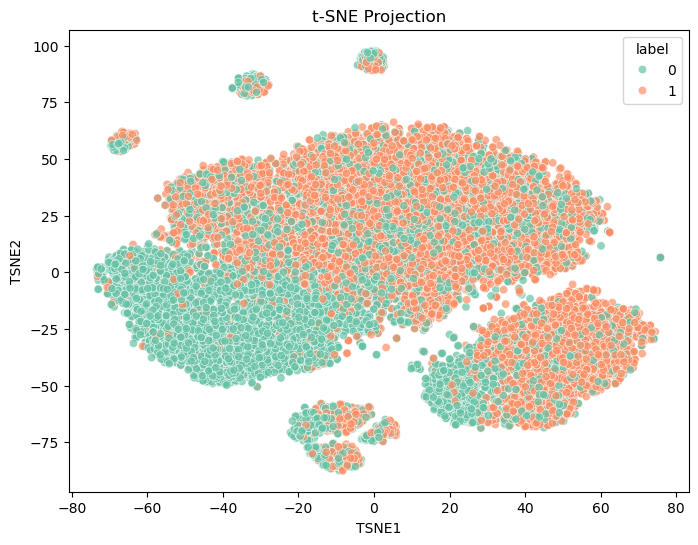

In [ ]:

train_copy = train_set.copy()
X = train_copy.drop('smoking', axis=1)
y = train_copy['smoking']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


tsne = TSNE(n_components=2, perplexity=50, learning_rate=800, n_iter=1000, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)


df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["label"] = y  


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="label", palette="Set2", alpha=0.7)
plt.title("t-SNE Projection")
plt.show()

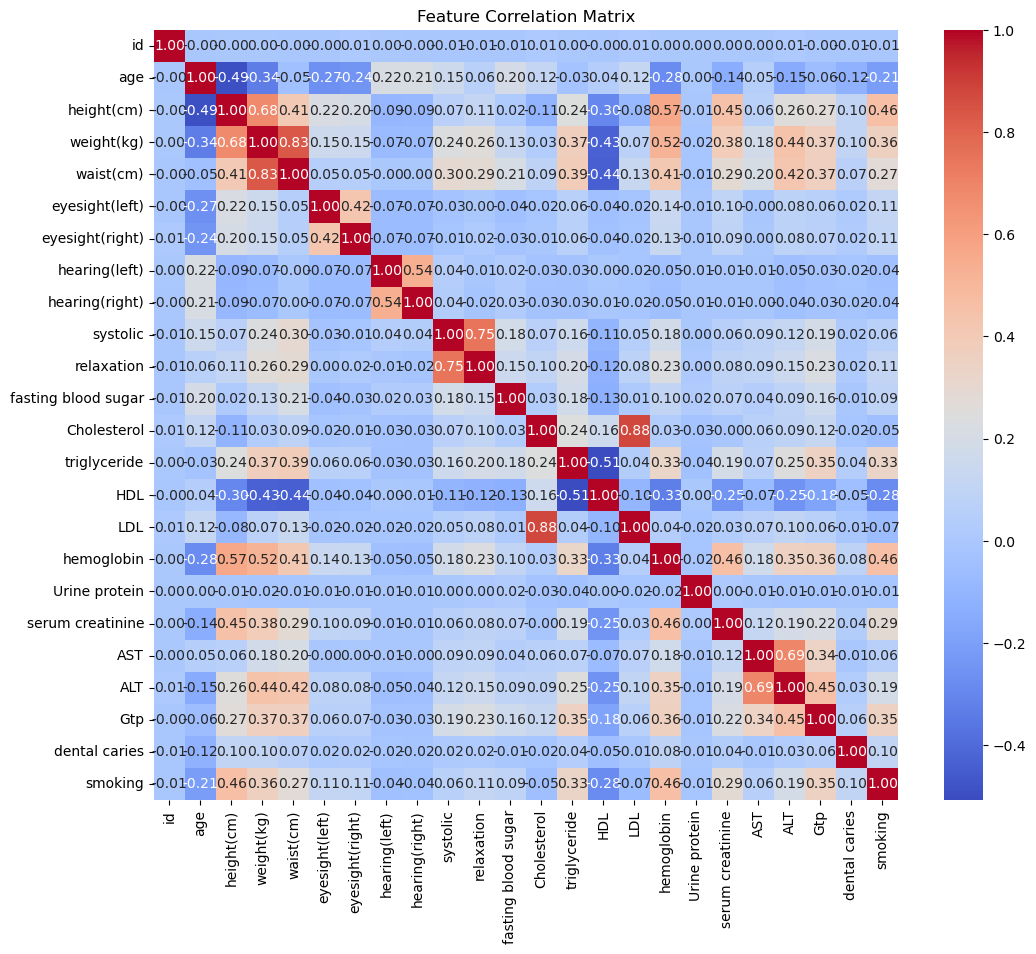

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = train_set


corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()